# Updating data frames

We will go over methods for updating a `pandas.DataFrame` using Palmer penguins.

## Adding a single column...

Start by importing packages and data

In [1]:
import numpy as np
import pandas as pd
import random # Used for randomly sampling integers

# Set the seed
random.seed(42)

# Import data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

## ... using dictionary-like syntax

Simplest way to add a new column to a `pandas.DataFrame`:

```python
df['new_column_name'] = new_column_values
```

If the column name exists, then the existing column will be updated
This syntax is the same as adding a new key=value pair to a dictionary:

```python
d[new_key] = new_value
```

### Example

Create a new column where the body mass is in kg instead of g

In [2]:
# Add a new column body_mass_kg
penguins['body_mass_kg'] = penguins['body_mass_g'] / 1000

# Confirm the new column is in the df
print('body_mass_kg' in penguins.columns)

# Look at the new column
penguins.head()

True


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.75
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.45


## ... using the `assign()` method

Create or update an existing column using `assign()`

```python
df = df.assign(new_col_name=new_col_values)
```

Notice: Column names are not string, we declare them as if we were creating variables. It doesn't modify things in place, this can be useful for chaining operations

<AxesSubplot:xlabel='bill_length_cm', ylabel='body_mass_g'>

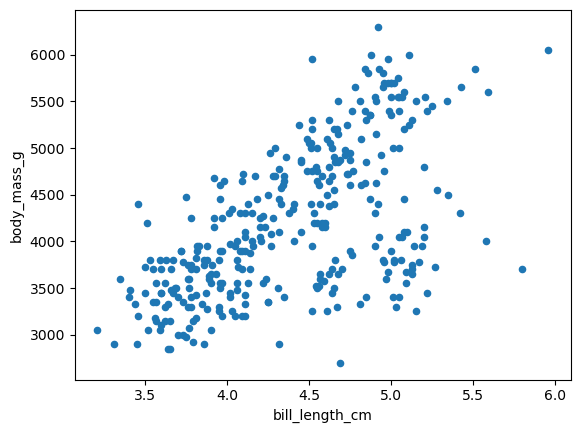

In [3]:
(penguins.assign(bill_length_cm=penguins['bill_length_mm']/10)
.plot(kind='scatter', 
     x='bill_length_cm',
     y='body_mass_g')
)

In [4]:
# Notice the bill_length_mm column was not added to the df
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.75
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.45


## ... at a specific location

The new column was added by default at the end of the df.
If we want to create a new column and insert at a particular location, we can use `insert()`:

### Example
Give each penguin observation a unique identifier as a three digit number, add this column at the beginning of the df

Modifies in place 

In [5]:
# Create unique random 3-digit codes
codes = random.sample(range(100,1000), len(penguins)) # Sampling without replacement

# Insert codes at the front of the df
penguins.insert(loc=0, # Index
                column='id_code', # New column name
                value=codes)

In [6]:
penguins

,id_code,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
0,754,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.750
1,214,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.800
2,125,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.250
3,859,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,381,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.450
...,...,...,...,...,...,...,...,...,...,...
339,140,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,4.000
340,183,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,3.400
341,969,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,3.775
342,635,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,4.100


## Adding multiple columns

Use `assign()` to create or update multiple columns in the same call:

```python
df = df.assign( newcol)
```

### Example
- flipper length from mm to cm
- code representing the observer

We can add these columns 

Use random.choices for sampling with replacement

In [7]:
# Create columns with observer codes and flipper length in cm
penguins = penguins.assign(flipper_length_cm=penguins['flipper_length_mm']/10,
                          observer=random.choices(['A', 'B', 'C'], k=len(penguins)))

In [8]:
penguins

,id_code,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg,flipper_length_cm,observer
0,754,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.750,18.1,C
1,214,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.800,18.6,A
2,125,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.250,19.5,C
3,859,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN,A
4,381,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.450,19.3,B
...,...,...,...,...,...,...,...,...,...,...,...,...
339,140,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,4.000,20.7,C
340,183,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,3.400,20.2,A
341,969,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,3.775,19.3,C
342,635,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,4.100,21.0,A


## Removing columns

remove using `drop()`

```
df=df.drop(columns=col_names)
```

`col_names` can be a single name or a list of names

### Example
Need to reassign

In [9]:
# Want to remove duplicate length and mass measurements
penguins=penguins.drop(columns=['flipper_length_mm', 'body_mass_g'])

# Confirm results
print(penguins.columns)

Index(['id_code', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'sex', 'year', 'body_mass_kg', 'flipper_length_cm', 'observer'],
      dtype='object')


## Updating values

Updates specific values in df

### A single value

Access a single value in a `pandas.DataFrame` using the locators:

- `at[]` to select by label
- `iat[]` to select by position

The syntax for `at()`:
```
df.at[single_value_index, 'column_name']
```

Think of it as the equivalent of `loc` when we want to access a single value

### Example

Update the index of the df to be `id_column`

In [10]:
penguins = penguins.set_index('id_code')
penguins

,species,island,bill_length_mm,bill_depth_mm,sex,year,body_mass_kg,flipper_length_cm,observer
id_code,,,,,,,,,
754,Adelie,Torgersen,39.1,18.7,male,2007,3.750,18.1,C
214,Adelie,Torgersen,39.5,17.4,female,2007,3.800,18.6,A
125,Adelie,Torgersen,40.3,18.0,female,2007,3.250,19.5,C
859,Adelie,Torgersen,NaN,NaN,NaN,2007,NaN,NaN,A
381,Adelie,Torgersen,36.7,19.3,female,2007,3.450,19.3,B
...,...,...,...,...,...,...,...,...,...
140,Chinstrap,Dream,55.8,19.8,male,2009,4.000,20.7,C
183,Chinstrap,Dream,43.5,18.1,female,2009,3.400,20.2,A
969,Chinstrap,Dream,49.6,18.2,male,2009,3.775,19.3,C


What was the bill length of the penguin with ID number 859?

In [11]:
# Check bill length of 859 
penguins.at[859, 'bill_length_mm']

nan

Update this value to 38.3 mm with 

In [12]:
penguins.at[859, 'bill_length_mm'] = 38.3

# Confirm the value was updated
penguins.loc[859]

species                 Adelie
island               Torgersen
bill_length_mm            38.3
bill_depth_mm              NaN
sex                        NaN
year                      2007
body_mass_kg               NaN
flipper_length_cm          NaN
observer                     A
Name: 859, dtype: object

If we want to access or update a single value by position we use `iat[]`:

```
df.iat[index_integer_location, column_integer_location]
```

Same way you would index values in a matrix 

We can dynamically get the location of a single column this way:
```
df.columns.get_loc('column_name')
```

### Example:
a. obtain the location of bill_length_mm 

b. use iat[] to access the same bill length value for your penguin and revert it back to NA. confirm udpate using iloc

In [13]:
penguins.columns.get_loc('bill_length_mm')

2

In [19]:
penguins.iat[3, 2] = np.nan # Use np to update to NaN

In [18]:
penguins.iloc[3]

species                 Adelie
island               Torgersen
bill_length_mm             NaN
bill_depth_mm              NaN
sex                        NaN
year                      2007
body_mass_kg               NaN
flipper_length_cm          NaN
observer                     A
Name: 859, dtype: object

#### How Carmen did it in class...

In [20]:
# Revert to NA using iat
bill_length_index = penguins.columns.get_loc('bill_length_mm')
penguins.iat[3,bill_length_index] = np.nan

# Check
penguins.iloc[3]

species                 Adelie
island               Torgersen
bill_length_mm             NaN
bill_depth_mm              NaN
sex                        NaN
year                      2007
body_mass_kg               NaN
flipper_length_cm          NaN
observer                     A
Name: 859, dtype: object

## Update multiple values in a column

### ...using a condition

When we need to create a new column where the new values depend on conditions of another column.

### Example

We want to classify the penguins such that:

- penguins body mass <3 : small
- penguins body mass >3 and <5 : medium
- penguins body mass >=5 and  : large

We can add this info to a new column with `numpy.select()`


In [24]:
# Create a list with the conditions
conditions = [penguins.body_mass_kg < 3,
             (3<=penguins.body_mass_kg) & (penguins.body_mass_kg<5),
             5<=penguins.body_mass_kg]

# Create a list of choices
choices = ['small', 'medium', 'large']

# Add selections
penguins['size'] = np.select(conditions,
                            choices,
                            default=np.nan) #values for anything outside conditions

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,sex,year,body_mass_kg,flipper_length_cm,observer,size
id_code,,,,,,,,,,
754,Adelie,Torgersen,39.1,18.7,male,2007,3.75,18.1,C,medium
214,Adelie,Torgersen,39.5,17.4,female,2007,3.80,18.6,A,medium
125,Adelie,Torgersen,40.3,18.0,female,2007,3.25,19.5,C,medium
859,Adelie,Torgersen,NaN,NaN,NaN,2007,NaN,NaN,A,nan
381,Adelie,Torgersen,36.7,19.3,female,2007,3.45,19.3,B,medium


## By seleting the values and then updating

Update some values in a column by selecting this data with loc of iloc 

The general syntax for updating with loc:
```
df.loc[row_selection, column_name] = new_values
```
where:

- `row_selection`: the rows we want to update, any expression that gives us a boolean pandas series
- `col_name` : a single column name
- `new_values` : the new values we want. If using multiple values, must be a list or series of the same length as the number of rows selected

Using `loc()` in assignment modifies data frame direcly without need for reassignment

### Example

Update the male values in sex column to be the letter M

In [27]:
# Select rows w sex=male and simplify
penguins.loc[penguins.sex=='male', 'sex'] = 'M'

# Check changes in sex columns specifically
print(penguins.sex.unique())

['M' 'female' nan]


## Best practices

We want to similarly update the femal values in sex column to F. We might try to do it this way:

In [29]:
# Select rows where sex=female and attempt to update values
penguins[penguins.sex=='female']['sex'] = 'F' # This raises a SettingWithCopyWarning

/tmp/ipykernel_1689776/1801686444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins[penguins.sex=='female']['sex'] = 'F' # This raises a SettingWithCopyWarning


The use of double brackets `[][]` is called **chained indexing**

When we select the data we want to update using chained indexing instead of `loc[]`, we get a `SettingWithCopyWarning`

The bug that this warning tells us about is that we did not update our dataframe

In [30]:
penguins['sex'].unique()

array(['M', 'female', nan], dtype=object)

**Avoid chained `[][]` and use `loc[]` instead**

This warning often arises when chained indexing

## Check-in
update the `female` value in penguins df without using chain indexing. Confirm

In [31]:
# No chain indexing
penguins.loc[penguins.sex=='female', 'sec'] = 'F'

penguins['sex'].unique()

array(['M', 'female', nan], dtype=object)